In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([10,20,30,40,50])

In [3]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [4]:
s[0]

10

In [5]:
marks = pd.Series([60,80,56,89,66], index =[101,102,103,104,105])

In [6]:
marks

101    60
102    80
103    56
104    89
105    66
dtype: int64

In [7]:
marks[102]

80

In [12]:
nums = pd.Series( np.random.randint(1,100,10), index = np.arange(101,111))

In [13]:
nums

101    66
102    75
103    59
104    37
105    50
106    53
107    83
108    31
109    73
110    59
dtype: int32

In [14]:
nums.is_unique

False

In [15]:
nums.axes

[Int64Index([101, 102, 103, 104, 105, 106, 107, 108, 109, 110], dtype='int64')]

In [16]:
nums.index

Int64Index([101, 102, 103, 104, 105, 106, 107, 108, 109, 110], dtype='int64')

In [17]:
nums.values

array([66, 75, 59, 37, 50, 53, 83, 31, 73, 59])

In [19]:
nums.loc[105], nums.iloc[5]

(50, 53)

In [21]:
nums.loc[101:105], nums.iloc[0:5]

(101    66
 102    75
 103    59
 104    37
 105    50
 dtype: int32,
 101    66
 102    75
 103    59
 104    37
 105    50
 dtype: int32)

In [22]:
nums[101:105]

Series([], dtype: int32)

In [23]:
nums[0:5]

101    66
102    75
103    59
104    37
105    50
dtype: int32

In [24]:
nums.describe()

count    10.00000
mean     58.60000
std      16.53414
min      31.00000
25%      50.75000
50%      59.00000
75%      71.25000
max      83.00000
dtype: float64

In [25]:
nums.mean(), nums.mode()

(58.6,
 0    59
 dtype: int32)

In [2]:
marks = pd.Series( np.random.randint(1,100,10), index = np.arange(101,111))

In [27]:
marks

101    48
102    59
103    60
104    88
105    19
106    95
107    82
108    49
109    63
110    66
dtype: int32

In [28]:
marks.is_unique

True

In [29]:
marks.mode()

0    19
1    48
2    49
3    59
4    60
5    63
6    66
7    82
8    88
9    95
dtype: int32

In [32]:
marks.index.is_unique

True

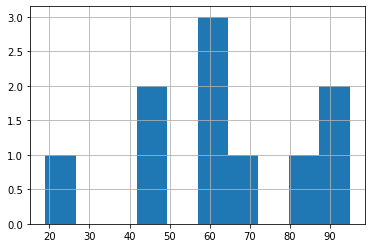

In [33]:
marks.hist()

In [37]:
marks.rank(ascending=False)

101     9.0
102     7.0
103     6.0
104     2.0
105    10.0
106     1.0
107     3.0
108     8.0
109     5.0
110     4.0
dtype: float64

In [36]:
marks

101    48
102    59
103    60
104    88
105    19
106    95
107    82
108    49
109    63
110    66
dtype: int32

In [38]:
marks = pd.Series([50,60,70,70,40])

In [41]:
marks.rank(ascending=False, method ='min')

0    4.0
1    3.0
2    1.0
3    1.0
4    5.0
dtype: float64

### 20-APR-2020

In [6]:
marks.agg(['min','max','sum','mean'])

min       3.0
max      87.0
sum     426.0
mean     42.6
dtype: float64

In [7]:
def get_grade(v):
    if v > 80:
        return "A"
    elif v > 60:
        return "B"
    else:
        return "C"

In [8]:
marks.apply(get_grade)

101    C
102    C
103    B
104    C
105    C
106    A
107    C
108    C
109    C
110    C
dtype: object

In [9]:
marks > 50

101    False
102    False
103     True
104    False
105     True
106     True
107    False
108    False
109    False
110    False
dtype: bool

In [10]:
marks.apply( lambda v : 'Pass' if v >= 50 else 'Fail')

101    Fail
102    Fail
103    Pass
104    Fail
105    Pass
106    Pass
107    Fail
108    Fail
109    Fail
110    Pass
dtype: object

In [12]:
marks.head(3)

101    35
102     3
103    68
dtype: int32

In [16]:
smarks = marks.sort_values(ascending=False)

In [20]:
smarks.iloc[:3]

106    87
103    68
105    52
dtype: int32

In [22]:
smarks.tail(3)

104    33
108    11
102     3
dtype: int32

In [28]:
sales = pd.Series((100,120,150,100,200), index  = np.arange(1,6))
sales.name  ="Units"
sales.index.name = "Month"

In [29]:
sales.pct_change() * 100

Month
1           NaN
2     20.000000
3     25.000000
4    -33.333333
5    100.000000
Name: Units, dtype: float64

In [30]:
sales.to_csv("sales.csv")

In [31]:
sales.to_json()

'{"1":100,"2":120,"3":150,"4":100,"5":200}'

In [34]:
sales.value_counts()

100    2
150    1
200    1
120    1
Name: Units, dtype: int64

### Handle null values

In [36]:
sales = pd.Series((100,120,150,100,200,np.nan,175,np.nan,200,100), 
                   index  = np.arange(1,11))
sales.name  ="Units"
sales.index.name = "Month"

In [39]:
sales.isna()

Month
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
Name: Units, dtype: bool

In [41]:
sales.isna().value_counts()

False    8
True     2
Name: Units, dtype: int64

In [42]:
sales.isna().sum()

2

In [43]:
sales.fillna(0)

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       0.0
7     175.0
8       0.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [45]:
sales.dropna()

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64